In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [29]:
dataset = pd.read_csv('E:/PyETL/vgg16_test/done/big_table/all_shoe_less.csv')
dataset = dataset.sort_values(['商品型號'], ascending=[True])
# dataset
x1 = dataset.iloc[:,3].values
# x1

# x2 = dataset.iloc[:,6].values
# x3 = dataset.iloc[:,9].values

In [30]:
# 處理 主要顏色欄位

rgb_color_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_color_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor1.append(rgb_color_list[i][0])
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor2.append(rgb_color_list[i][1])
rgb_mcolor2

## 抓RGB的B顏色

for i in range(len(rgb_color_list)):
    rgb_mcolor3.append(rgb_color_list[i][2])
rgb_mcolor3

[55,
 84,
 42,
 38,
 31,
 25,
 18,
 19,
 185,
 223,
 22,
 29,
 82,
 163,
 172,
 73,
 70,
 21,
 48,
 234,
 138,
 174,
 86,
 234,
 29,
 22,
 39,
 39,
 177,
 188,
 174,
 53,
 23,
 36,
 203,
 203,
 170,
 137,
 25,
 43,
 25,
 50,
 42,
 141,
 43,
 158,
 118,
 29,
 43,
 134,
 30,
 19,
 232,
 60,
 252,
 95,
 53,
 28,
 15,
 31,
 47,
 39,
 64,
 37,
 19,
 55,
 206,
 212,
 199,
 202,
 57,
 168,
 55,
 57,
 40,
 19,
 38,
 39,
 64,
 20,
 52,
 237,
 140,
 46,
 29,
 56,
 19,
 165,
 45,
 95,
 45,
 47,
 38,
 46,
 56,
 186,
 172,
 230,
 192,
 116,
 61,
 85,
 45,
 35,
 206,
 56,
 33,
 73,
 69,
 181,
 39,
 69,
 40,
 22,
 93,
 69,
 15,
 32,
 78,
 78,
 77,
 67,
 54,
 48,
 25,
 36,
 163,
 192,
 189,
 25,
 146,
 196,
 35,
 196,
 62,
 17,
 39,
 76,
 68,
 28,
 57,
 184,
 26,
 85,
 17,
 162,
 96,
 76,
 68,
 83,
 11,
 36,
 27,
 9,
 58,
 75,
 54,
 39,
 228,
 39,
 20,
 228,
 97,
 30,
 58,
 21,
 207,
 111,
 210,
 75,
 45,
 77,
 10,
 58,
 75,
 207,
 18,
 57,
 35,
 38,
 41,
 11,
 27,
 169,
 14,
 28,
 37,
 166,
 81,
 71,

In [31]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

print(rgb_to_hsv(255, 255, 255))
print(rgb_to_hsv(0, 215, 0))

(0, 0.0, 100.0)
(120.0, 100.0, 84.31372549019608)


In [32]:
import math
hsv_mcolor1 = []
hsv_mcolor2 = []
hsv_mcolor3 = []

for i in range(len(rgb_color_list)):
    h, s, v = rgb_to_hsv(rgb_color_list[i][0], rgb_color_list[i][1], rgb_color_list[i][2])
    h = math.cos(h*math.pi/180)
    h = (h+1)/2
    s = s/100
    v = v / 100
    hsv_mcolor1.append(h)
    hsv_mcolor2.append(s)
    hsv_mcolor3.append(v)
hsv_mcolor3

[0.2235294117647059,
 0.3294117647058823,
 0.16862745098039217,
 0.14901960784313725,
 0.12156862745098039,
 0.09803921568627452,
 0.07058823529411765,
 0.07450980392156863,
 0.8352941176470589,
 0.9019607843137255,
 0.08627450980392157,
 0.13333333333333333,
 0.3254901960784313,
 0.6392156862745098,
 0.6745098039215687,
 0.28627450980392155,
 0.2823529411764706,
 0.08235294117647057,
 0.18823529411764706,
 0.9176470588235294,
 0.5411764705882353,
 0.6823529411764706,
 0.8745098039215686,
 0.9176470588235294,
 0.11372549019607843,
 0.09019607843137255,
 0.18823529411764706,
 0.15294117647058825,
 0.7137254901960784,
 0.7372549019607844,
 0.6823529411764706,
 0.20784313725490197,
 0.10196078431372549,
 0.1568627450980392,
 0.8156862745098039,
 0.8156862745098039,
 0.6666666666666665,
 0.5372549019607843,
 0.10196078431372549,
 0.17647058823529413,
 0.10196078431372549,
 0.20392156862745098,
 0.17254901960784313,
 0.5529411764705883,
 0.17647058823529413,
 0.6196078431372549,
 0.46274509

In [33]:
dataset.insert(2, "V", hsv_mcolor3)
dataset.insert(2, "S", hsv_mcolor2)
dataset.insert(2, "H", hsv_mcolor1)
dataset

,商品型號,商品網址,H,S,V,主要顏色名稱,主要顏色編號,主要顏色占比,次要顏色名稱,次要顏色編號,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.933013,0.035088,0.223529,DarkSlateGray,#393837,0.599,WhiteSmoke,#ebebec,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.750000,0.011905,0.329412,DimGray,#545354,0.642,WhiteSmoke,#ebebec,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.750000,0.023256,0.168627,Black,#2b2b2a,0.631,WhiteSmoke,#e9e9eb,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,1.000000,0.000000,0.149020,Black,#262626,0.552,WhiteSmoke,#e8e8e9,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.750000,0.032258,0.121569,Black,#1f1e1f,0.412,DimGray,#594844,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.413176,0.014151,0.831373,LightGray,#d2d1d4,0.704,DimGray,#5d5d64,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.750000,0.035088,0.223529,DarkSlateGray,#393937,0.543,DarkGray,#9d9d9e,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.956773,0.075188,0.521569,Gray,#857b7f,0.544,WhiteSmoke,#f4f1f2,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.200000,0.176471,Black,#24242d,0.428,LightGray,#ccd0d5,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [34]:
x = dataset.iloc[:, [2, 3, 4]].values

# 主要顏色 +pa數
# x = dataset.iloc[:, [2, 3, 4, 7]].values

x

array([[0.9330127 , 0.03508772, 0.22352941],
       [0.75      , 0.01190476, 0.32941176],
       [0.75      , 0.02325581, 0.16862745],
       ...,
       [0.95677273, 0.07518797, 0.52156863],
       [0.25      , 0.2       , 0.17647059],
       [0.5       , 0.00881057, 0.89019608]])

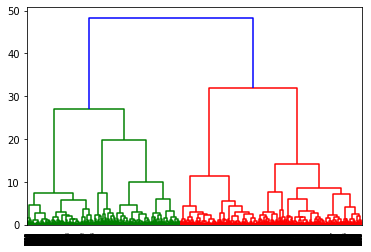

In [18]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
# threshold = [0.5] * len(x)

# p2, = plt.plot(x, threshold, "--r", label="threshold")

In [35]:
model = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
model.fit(x)
labels = model.labels_

In [ ]:
plt.scatter(x[labels==0, 0], x[labels==0, 0], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 0], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 0], s=50, marker='o', color='green')
plt.scatter(x[labels==3, 0], x[labels==3, 0], s=50, marker='o', color='purple')
plt.scatter(x[labels==4, 0], x[labels==4, 0], s=50, marker='o', color='orange')
plt.scatter(x[labels==5, 0], x[labels==5, 0], s=50, marker='o', color='black')

#################################################################

# plt.scatter(x[labels==0, 0], 1, s=50, marker='o', color='red')
# plt.scatter(x[labels==1, 0], 10, s=50, marker='o', color='blue')
# plt.scatter(x[labels==2, 0], 20, s=50, marker='o', color='green')
# plt.scatter(x[labels==3, 0], 30, s=50, marker='o', color='purple')
# plt.scatter(x[labels==4, 0], x[labels==4, 1], s=50, marker='o', color='orange')

plt.show()

### 3D圖繪製

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d    

# ## 讓3d圖可旋轉
# %matplotlib notebook

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(hsv_mcolor1, hsv_mcolor2, hsv_mcolor3)

# plt.show()

<IPython.core.display.Javascript object>


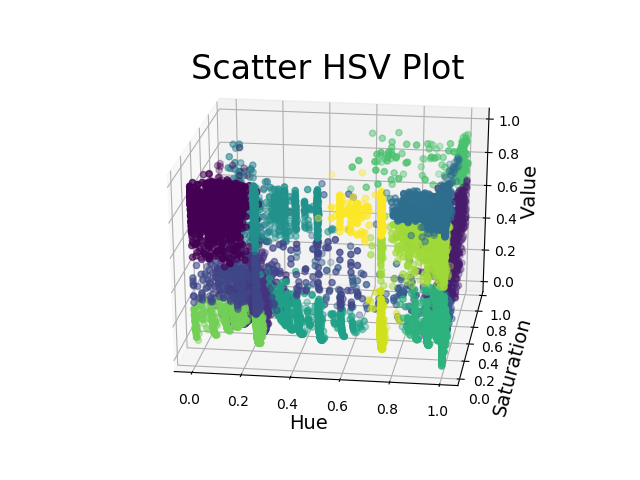

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [36]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook



# model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
# model = model.fit(x)
# labels = model.labels_

# len(set(labels))

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)

ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
for i in range(len(set(labels))): #Labels of the clusters 
    print(len(ColorsA))
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [37]:
import os
path = "E:/PyETL/vgg16_test/done/big_table/all_pics/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '100007_BKW.jpg',
 '100013_BKLD.jpg',
 '100026_BBK.jpg',
 '100026_NAT.jpg',
 '100084_GUN.jpg',
 '1011A002-001.jpg',
 '1011A002-002.jpg',
 '1011A002-020.jpg',
 '1011A002-021.jpg',
 '1011A002-400.jpg',
 '1011A002-401.jpg',
 '1011A008-001.jpg',
 '1011A008-002.jpg',
 '1011A008-003.jpg',
 '1011A008-020.jpg',
 '1011A008-021.jpg',
 '1011A008-400.jpg',
 '1011A008-600.jpg',
 '1011A014-020.jpg',
 '1011A019-001.jpg',
 '1011A019-002.jpg',
 '1011A019-004.jpg',
 '1011A019-020.jpg',
 '1011A019-021.jpg',
 '1011A019-022.jpg',
 '1011A019-300.jpg',
 '1011A019-400.jpg',
 '1011A021-001.jpg',
 '1011A022-001.jpg',
 '1011A023-021.jpg',
 '1011A029-021.jpg',
 '1011A030-001.jpg',
 '1011A038-021.jpg',
 '1011A041-001.jpg',
 '1011A041-021.jpg',
 '1011A042-001.jpg',
 '1011A042-003.jpg',
 '1011A042-004.jpg',
 '1011A042-020.jpg',
 '1011A042-021.jpg',
 '1011A042-400.jpg',
 '1011A042-403.jpg',
 '1011A045-002.jpg',
 '1011A131-002.jpg',
 '1011A131

In [40]:
# import os, shutil
# dp = 'E:/PyETL/color_cluster/Agglomerative/HSV/maj_pa/'
# for i in range(len(labels)):
#     if not os.path.exists(dp + str(labels[i])):
#         os.makedirs(dp + str(labels[i]))
#     path = dp + str(labels[i])
#     shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])


import os, shutil
dp = 'E:/PyETL/color_cluster/Agglomerative/HSV/maj/'
for i in range(len(labels)):
    if not os.path.exists(dp + str(labels[i])):
        os.makedirs(dp + str(labels[i]))
    path = dp + str(labels[i])
    shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])

# 參考其他顏色

In [6]:
dataset = pd.read_csv('E:/PyETL/vgg16_test/done/big_table/all_shoe_less.csv')

x1 = dataset.iloc[:,3].values
x2 = dataset.iloc[:,6].values
x3 = dataset.iloc[:,9].values
# pa1 = dataset.iloc[:,4].values
# pa2 = dataset.iloc[:,7].values
# pa3 = dataset.iloc[:,10].values
# dataset.iloc[:,10].values

In [7]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

print(rgb_to_hsv(255, 255, 255))
print(rgb_to_hsv(0, 215, 0))

(0, 0.0, 100.0)
(120.0, 100.0, 84.31372549019608)


In [8]:
# 處理 主要顏色欄位



#################     主要顏色         ######################

rgb_mcolor_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_mcolor_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_mcolor_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_mcolor_list)):
    rgb_mcolor1.append(rgb_mcolor_list[i][0]/255)
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_mcolor_list)):
    rgb_mcolor2.append(rgb_mcolor_list[i][1]/255)
rgb_mcolor2

## 抓RGB的B顏色
for i in range(len(rgb_mcolor_list)):
    rgb_mcolor3.append(rgb_mcolor_list[i][2]/255)
rgb_mcolor3


#################     次要顏色         ######################

rgb_scolor_list = []
for hex_color2 in x2:
    # 轉10進制
    rgb_scolor_list.append(list(int(hex_color2[i:i+2], 16) for i in (1, 3, 5)))
rgb_scolor_list
rgb_scolor1 = []
rgb_scolor2 = []
rgb_scolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_scolor_list)):
    rgb_scolor1.append(rgb_scolor_list[i][0]/255)
rgb_scolor1

## 抓RGB的G顏色
for i in range(len(rgb_scolor_list)):
    rgb_scolor2.append(rgb_scolor_list[i][1]/255)
rgb_scolor2

## 抓RGB的B顏色
for i in range(len(rgb_scolor_list)):
    rgb_scolor3.append(rgb_scolor_list[i][2]/255)
rgb_scolor3



#################     其他顏色         ######################

rgb_elcolor_list = []
for hex_color3 in x3:
    # 轉10進制
    rgb_elcolor_list.append(list(int(hex_color3[i:i+2], 16) for i in (1, 3, 5)))
rgb_elcolor_list
rgb_elcolor1 = []
rgb_elcolor2 = []
rgb_elcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_elcolor_list)):
    rgb_elcolor1.append(rgb_elcolor_list[i][0]/255)
rgb_elcolor1

## 抓RGB的G顏色
for i in range(len(rgb_elcolor_list)):
    rgb_elcolor2.append(rgb_elcolor_list[i][1]/255)
rgb_elcolor2

## 抓RGB的B顏色
for i in range(len(rgb_elcolor_list)):
    rgb_elcolor3.append(rgb_elcolor_list[i][2]/255)
rgb_elcolor3


[0.6078431372549019,
 0.611764705882353,
 0.38823529411764707,
 0.403921568627451,
 0.9215686274509803,
 0.17647058823529413,
 0.6352941176470588,
 0.1803921568627451,
 0.9137254901960784,
 0.9333333333333333,
 0.07058823529411765,
 0.27058823529411763,
 0.9137254901960784,
 0.6745098039215687,
 0.16470588235294117,
 0.6784313725490196,
 0.5411764705882353,
 0.9294117647058824,
 0.36470588235294116,
 0.9176470588235294,
 0.9254901960784314,
 0.7411764705882353,
 0.9176470588235294,
 0.3333333333333333,
 0.9215686274509803,
 0.5607843137254902,
 0.16470588235294117,
 0.40784313725490196,
 0.17254901960784313,
 0.615686274509804,
 0.6549019607843137,
 0.6274509803921569,
 0.33725490196078434,
 0.7686274509803922,
 0.6431372549019608,
 0.10196078431372549,
 0.29411764705882354,
 0.6274509803921569,
 0.6980392156862745,
 0.6431372549019608,
 0.9137254901960784,
 0.803921568627451,
 0.2549019607843137,
 0.5529411764705883,
 0.5803921568627451,
 0.29411764705882354,
 0.43529411764705883,
 0.

In [9]:
import math

##############   主要顏色轉換   #######################
hsv_mcolor1 = []
hsv_mcolor2 = []
hsv_mcolor3 = []

for i in range(len(rgb_mcolor_list)):
    mh, ms, mv = rgb_to_hsv(rgb_mcolor_list[i][0], rgb_mcolor_list[i][1], rgb_mcolor_list[i][2])
    mh = math.cos(mh*math.pi/180)
    mh = (mh+1)/2
    ms = ms/100
    mv = mv / 100
    hsv_mcolor1.append(mh)
    hsv_mcolor2.append(ms)
    hsv_mcolor3.append(mv)
hsv_mcolor1



##############   次要顏色轉換   #######################


hsv_scolor1 = []
hsv_scolor2 = []
hsv_scolor3 = []

for i in range(len(rgb_scolor_list)):
    sh, ss, sv = rgb_to_hsv(rgb_scolor_list[i][0], rgb_scolor_list[i][1], rgb_scolor_list[i][2])
    sh = math.cos(sh*math.pi/180)
    sh = (sh+1)/2
    ss = ss/100
    sv = sv / 100
    hsv_scolor1.append(sh)
    hsv_scolor2.append(ss)
    hsv_scolor3.append(sv)
hsv_scolor1


##############   其他顏色轉換   #######################

hsv_elcolor1 = []
hsv_elcolor2 = []
hsv_elcolor3 = []

for i in range(len(rgb_elcolor_list)):
    elh, els, elv = rgb_to_hsv(rgb_elcolor_list[i][0], rgb_elcolor_list[i][1], rgb_elcolor_list[i][2])
    elh = math.cos(elh*math.pi/180)
    elh = (elh+1)/2
    els = els/100
    elv = elv / 100
    hsv_elcolor1.append(elh)
    hsv_elcolor2.append(els)
    hsv_elcolor3.append(elv)
hsv_elcolor1

[0.8830222215594881,
 0.75,
 0.9330127018922192,
 0.9698463103929545,
 0.0669872981077807,
 0.9330127018922199,
 0.75,
 0.13347406408508689,
 0.14644660940672616,
 0.24999999999999978,
 0.9444177243274618,
 0.9981658654313457,
 0.2500000000000001,
 0.24999999999999978,
 0.11697777844051127,
 0.06698729810777881,
 0.116977778440511,
 0.11697777844051194,
 0.14644660940672505,
 0.24999999999999978,
 0.49999999999999634,
 0.010926199633096989,
 0.24999999999999978,
 0.4999999999999999,
 0.24999999999999978,
 0.030153689607045786,
 0.75,
 0.9880127105518122,
 0.24999999999999978,
 0.75,
 0.9890738003669028,
 0.24999999999999978,
 0.8830222215594883,
 0.24999999999999978,
 0.11697777844051194,
 0.9917308508168711,
 0.2922924934990564,
 0.13347406408508705,
 0.14644660940672616,
 0.14644660940672682,
 0.14644660940672616,
 0.959989721829412,
 0.943599527300143,
 0.24999999999999978,
 0.24999999999999978,
 0.19561928549563956,
 1.0,
 0.9829629131445343,
 0.11697777844050883,
 1.0,
 0.11697777

In [10]:
dataset.insert(2, "MV", hsv_mcolor3)
dataset.insert(2, "MS", hsv_mcolor2)
dataset.insert(2, "MH", hsv_mcolor1)

dataset.insert(2, "SV", hsv_scolor3)
dataset.insert(2, "SS", hsv_scolor2)
dataset.insert(2, "SH", hsv_scolor1)

dataset.insert(2, "ELV", hsv_elcolor3)
dataset.insert(2, "ELS", hsv_elcolor2)
dataset.insert(2, "ELH", hsv_elcolor1)

dataset

,商品型號,商品網址,ELH,ELS,ELV,SH,SS,SV,MH,MS,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.883022,0.018987,0.619608,0.250000,0.004237,0.925490,0.933013,0.035088,...,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.750000,0.025000,0.627451,0.250000,0.004237,0.925490,0.750000,0.011905,...,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.933013,0.020000,0.392157,0.250000,0.008511,0.921569,0.750000,0.023256,...,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,0.969846,0.028302,0.415686,0.250000,0.004292,0.913725,1.000000,0.000000,...,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.066987,0.008511,0.921569,0.990086,0.235955,0.349020,0.750000,0.032258,...,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,3983529957813450,https://www.mrporter.com/en-us/mens/product/mr...,0.969846,0.034091,0.345098,0.750000,0.004049,0.968627,0.969846,0.034091,...,0.054,DimGray,#585655,0.946,https://cache.mrporter.com/variants/images/398...,Jacques Full-Grain Leather Brogue Boots,mr p.,M,565,"EXCLUSIVE AT MR PORTER. Hard-wearing, sturdy a..."
9691,5526882328139141,https://www.mrporter.com/en-us/mens/product/dr...,1.000000,0.000000,0.960784,1.000000,0.000000,0.450980,1.000000,0.000000,...,0.131,WhiteSmoke,#f5f5f5,0.085,https://cache.mrporter.com/variants/images/552...,Leather Boots,dries van noten,M,970,If you plan on roaming city streets in all typ...
9692,2307389542181587,https://www.mrporter.com/en-us/mens/product/am...,0.986522,0.103448,0.341176,0.750000,0.004065,0.964706,0.945746,0.521277,...,0.088,DimGray,#57504e,0.023,https://cache.mrporter.com/variants/images/230...,Suede Chukka Boots,ami,M,550,AMI's pieces are inspired by everyday life in ...
9693,4146401442999224,https://www.mrporter.com/en-us/mens/product/ed...,0.933013,0.008032,0.976471,0.956773,0.245902,0.478431,0.964405,0.689655,...,0.210,WhiteSmoke,#f9f8f7,0.118,https://cache.mrporter.com/variants/images/414...,Galway Cap-Toe Textured-Leather Boots,edward green,M,"1,660",As one of the top outfitters for the British m...


In [11]:
x = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10]].values

# +pa數 (13, 16, 19)
# x = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 16, 19]].values
x

array([[0.88302222, 0.01898734, 0.61960784, ..., 0.9330127 , 0.03508772,
        0.22352941],
       [0.75      , 0.025     , 0.62745098, ..., 0.75      , 0.01190476,
        0.32941176],
       [0.9330127 , 0.02      , 0.39215686, ..., 0.75      , 0.02325581,
        0.16862745],
       ...,
       [0.98652244, 0.10344828, 0.34117647, ..., 0.94574557, 0.5212766 ,
        0.7372549 ],
       [0.9330127 , 0.00803213, 0.97647059, ..., 0.96440478, 0.68965517,
        0.45490196],
       [1.        , 0.        , 0.96862745, ..., 1.        , 0.        ,
        0.04313725]])

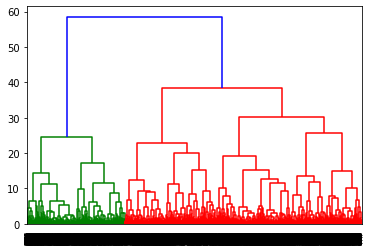

In [12]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

<IPython.core.display.Javascript object>


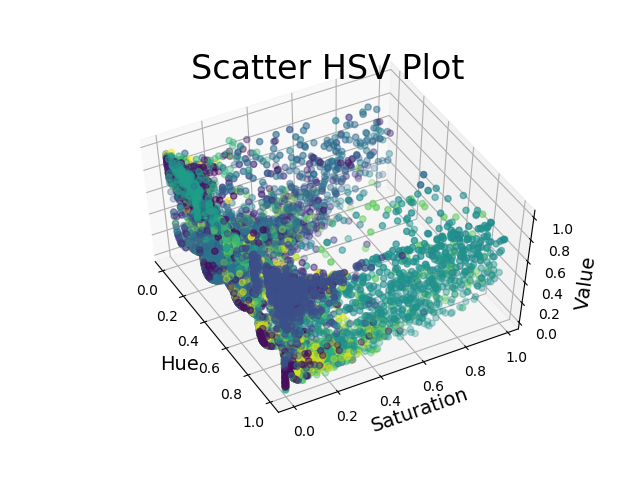

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

30
30
30
30
30
30
30


In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook



model = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
model = model.fit(x)
labels = model.labels_

# len(set(labels))

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)

ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
for i in range(len(set(labels))): #Labels of the clusters 
    print(len(ColorsA))
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [15]:
import os
path = "E:/PyETL/vgg16_test/done/big_table/all_pics/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '100007_BKW.jpg',
 '100013_BKLD.jpg',
 '100026_BBK.jpg',
 '100026_NAT.jpg',
 '100084_GUN.jpg',
 '1011A002-001.jpg',
 '1011A002-002.jpg',
 '1011A002-020.jpg',
 '1011A002-021.jpg',
 '1011A002-400.jpg',
 '1011A002-401.jpg',
 '1011A008-001.jpg',
 '1011A008-002.jpg',
 '1011A008-003.jpg',
 '1011A008-020.jpg',
 '1011A008-021.jpg',
 '1011A008-400.jpg',
 '1011A008-600.jpg',
 '1011A014-020.jpg',
 '1011A019-001.jpg',
 '1011A019-002.jpg',
 '1011A019-004.jpg',
 '1011A019-020.jpg',
 '1011A019-021.jpg',
 '1011A019-022.jpg',
 '1011A019-300.jpg',
 '1011A019-400.jpg',
 '1011A021-001.jpg',
 '1011A022-001.jpg',
 '1011A023-021.jpg',
 '1011A029-021.jpg',
 '1011A030-001.jpg',
 '1011A038-021.jpg',
 '1011A041-001.jpg',
 '1011A041-021.jpg',
 '1011A042-001.jpg',
 '1011A042-003.jpg',
 '1011A042-004.jpg',
 '1011A042-020.jpg',
 '1011A042-021.jpg',
 '1011A042-400.jpg',
 '1011A042-403.jpg',
 '1011A045-002.jpg',
 '1011A131-002.jpg',
 '1011A131

In [16]:
import os, shutil
dp = 'E:/PyETL/color_cluster/Agglomerative/HSV/all_col/'
for i in range(len(labels)):
    if not os.path.exists(dp + str(labels[i])):
        os.makedirs(dp + str(labels[i]))
    path = dp + str(labels[i])
    shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])